### Submitted by:
- Shahar Asher
- Hadar Liel Harush

In [38]:
import os, wave, sys
import numpy as np
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install scipy
from scipy import signal
from scipy.io.wavfile import read, write
from scipy.signal import spectrogram
from scipy.io import wavfile

from sklearn.decomposition import FastICA

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [39]:
# --- 4 B ---

In [40]:
def get_wav_files_in_current_directory(directory):
    wav_files = [f"{directory}\\{file}" for file in os.listdir(directory) if file.endswith('.wav')]
    return wav_files

In [41]:
wav_files_in_current_directory = get_wav_files_in_current_directory(".\\sounds\\OriginalSounds")

In [42]:
# --- plot ---

In [43]:
def plot_waveform_and_spectrogram(wav_file):
    plt.rcParams["figure.figsize"] = [10, 6]
    plt.rcParams["figure.autolayout"] = True

    # Read the WAV file
    sample_rate, audio = read(wav_file)
    
    # Plot waveform
    plt.subplot(2, 1, 1)
    plt.plot(audio)
    plt.title("Waveform: " + wav_file)
    plt.ylabel("Amplitude")
    plt.xlabel("Time")

    # Plot spectrogram
    plt.subplot(2, 1, 2)
    plt.specgram(audio, Fs=sample_rate)
    plt.title("Spectrogram: " + wav_file)
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [sec]")

    plt.show()

['.\\sounds\\OriginalSounds\\source1.wav', '.\\sounds\\OriginalSounds\\source2.wav', '.\\sounds\\OriginalSounds\\source3.wav', '.\\sounds\\OriginalSounds\\source4.wav', '.\\sounds\\OriginalSounds\\source5.wav', '.\\sounds\\OriginalSounds\\source6.wav']


c:\anaconda\Lib\site-packages\matplotlib\axes\_axes.py:7939: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


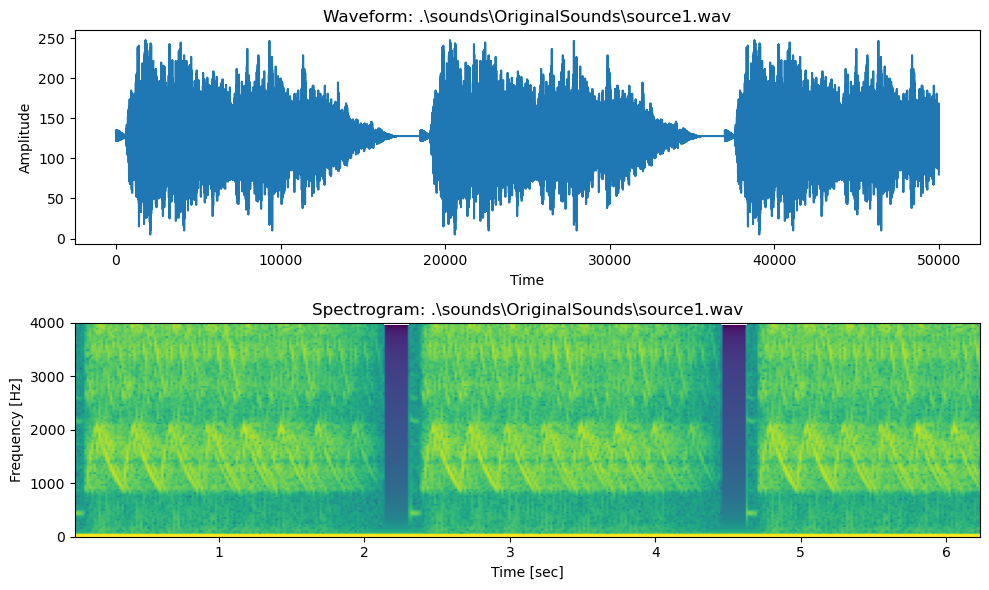

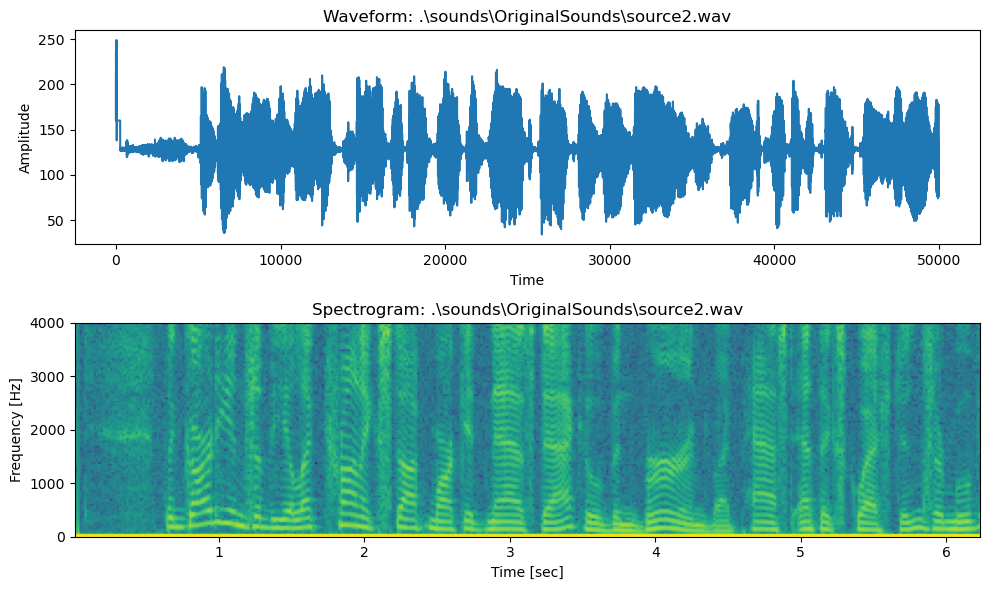

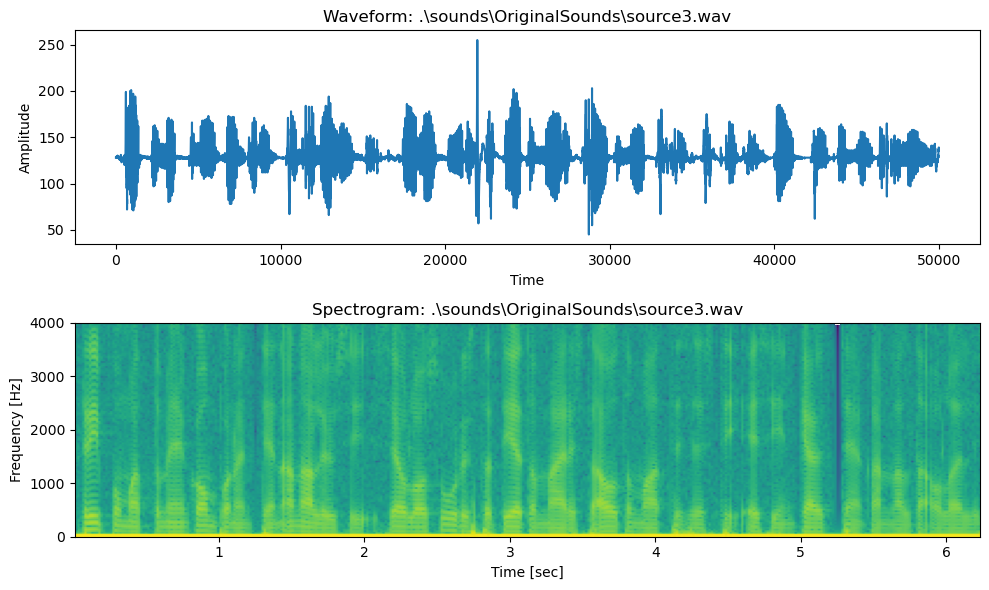

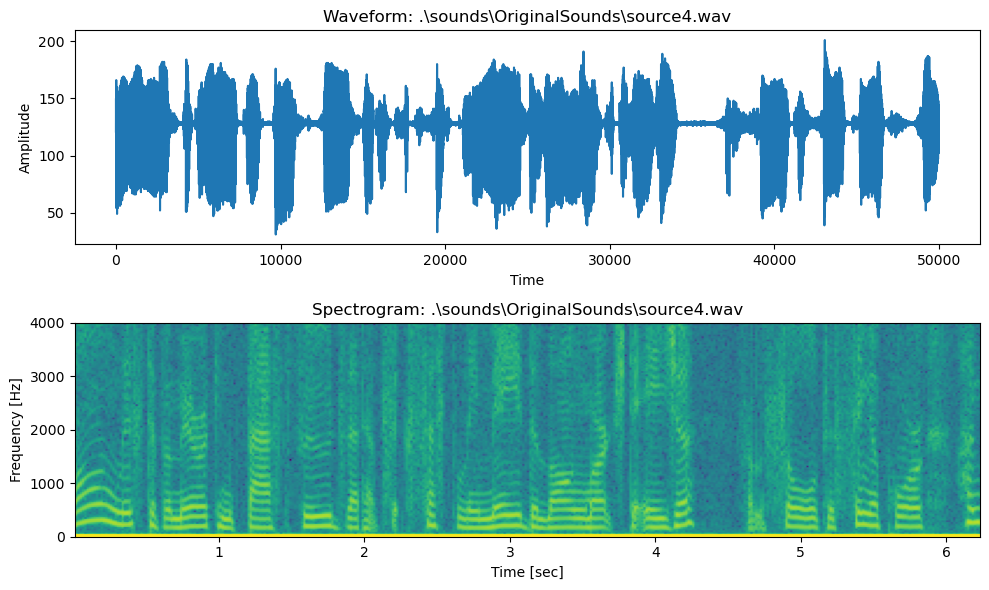

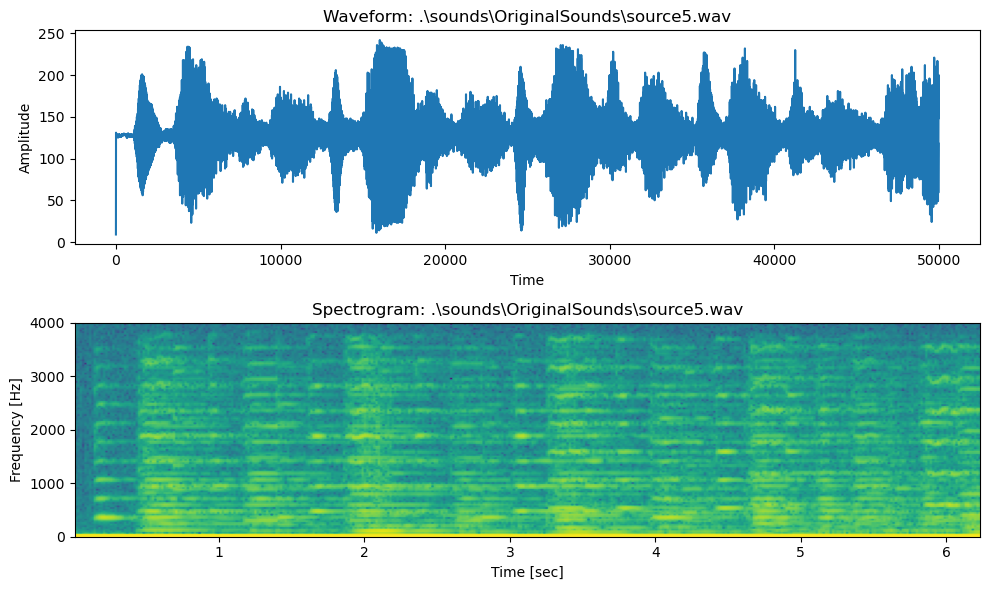

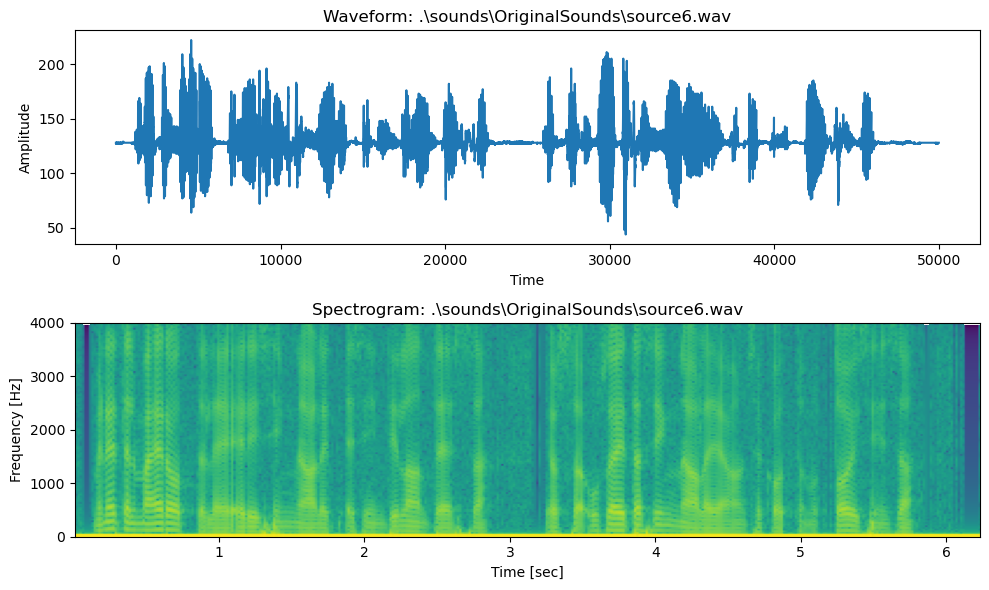

In [44]:
print(wav_files_in_current_directory)

# הצגת ספקטרוגרמה של כל קובץ קול בתיקייה הנוכחית
for wav_file in wav_files_in_current_directory:
    plot_waveform_and_spectrogram(wav_file)

In [45]:
# -- 4 C ---

In [46]:
random_matrix = np.random.uniform(0.5, 2.5, size=(6, 6))
print(f"random mixing matrix: {random_matrix}")

random mixing matrix: [[1.38761143 0.53582818 2.25590596 2.48083431 0.51998266 1.44513325]
 [0.79990845 0.75200419 1.77367723 0.59208429 0.96925509 1.29527711]
 [0.67964525 1.95430489 0.70012129 0.66326694 1.88092209 1.6339797 ]
 [2.22527047 1.64328364 1.73759195 2.26255092 0.98050667 1.10389973]
 [1.6410208  2.04596779 0.98586928 1.80312829 0.9252368  2.05899668]
 [1.17272556 0.65205344 0.59963391 1.15901596 0.97047495 1.41069576]]


In [47]:
# --- 4 D ---

In [48]:
mixed_audio_names = []

# Reading and saving the mixed signals
for idx, audio_file in enumerate(wav_files_in_current_directory):
    # Reading the audio from the file
    sample_rate, audio_data = read(audio_file)
    
    # Reshaping the array to a matrix
    reshaped_audio = np.reshape(audio_data, (-1, 1))
    reshaped_random_matrix = np.reshape(random_matrix, (1, -1))

    # Multiplying the audio by the mixing matrix
    mixed_audio = np.dot(reshaped_audio, reshaped_random_matrix)

    # Setting a new file name
    output_file = f".\\sounds\\MixedSounds\\mixed_audio_{idx}.wav"

    new_audio = wave.open(output_file, 'w')
    new_audio.setnchannels(1)
    new_audio.setsampwidth(2)
    new_audio.setframerate(sample_rate)
    new_audio.setcomptype('NONE', 'Not Compressed')
    new_audio.writeframes(mixed_audio.tobytes())
    new_audio.close()

    mixed_audio_names.append(output_file)
    
    print(f"Mixed audio from file {audio_file} was successfully saved in file {output_file}")

Mixed audio from file .\sounds\OriginalSounds\source1.wav was successfully saved in file .\sounds\MixedSounds\mixed_audio_0.wav
Mixed audio from file .\sounds\OriginalSounds\source2.wav was successfully saved in file .\sounds\MixedSounds\mixed_audio_1.wav
Mixed audio from file .\sounds\OriginalSounds\source3.wav was successfully saved in file .\sounds\MixedSounds\mixed_audio_2.wav
Mixed audio from file .\sounds\OriginalSounds\source4.wav was successfully saved in file .\sounds\MixedSounds\mixed_audio_3.wav
Mixed audio from file .\sounds\OriginalSounds\source5.wav was successfully saved in file .\sounds\MixedSounds\mixed_audio_4.wav
Mixed audio from file .\sounds\OriginalSounds\source6.wav was successfully saved in file .\sounds\MixedSounds\mixed_audio_5.wav


# שאלה ה:

In [49]:
S= np.array([wavfile.read(file)[1] for file in wav_files_in_current_directory])
X = np.array([wavfile.read(file)[1] for file in mixed_audio_names])

In [50]:
# Compute ICA
ica = FastICA(n_components=6, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals

for i, reconstructed_source in enumerate(S_):
    # Setting a new file name
    output_file = f".\\reconstructed_source{i+1}.wav"

    new_audio = wave.open(output_file, 'w')
    new_audio.setnchannels(1)
    new_audio.setsampwidth(2)
    new_audio.setframerate()
    new_audio.setcomptype('NONE', 'Not Compressed')
    new_audio.writeframes(reconstructed_source.tobytes())
    new_audio.close()


# # A_ = ica.mixing_  # Get estimated mixing matrix

# plt.figure()

# models = [X, S, S_]
# names = [
#     "Observations (mixed signal)",
#     "True Sources",
#     "ICA recovered signals"
# ]
# #colors = ["red", "steelblue", "orange"]

# for ii, (model, name) in enumerate(zip(models, names), 1):
#     plt.subplot(4, 1, ii)
#     plt.title(name)
#     print(type(model))
#     plt.plot(model)
#     # for sig in model.T:
#     #     plt.plot(sig)

# plt.tight_layout()
# plt.show()